In [26]:
import sys
import os
from importlib import reload
import numpy as np
import pylab as pl

sys.path.insert(0, '../src')
import datasetGen.preprocessor as prep
import utils.geofunctions as gf

reload(prep)
reload(gf)

%matplotlib inline

In [27]:
DATA_DIR = "../data_real"
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-R6G5B4.tif")
raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-B1-7.tif")
vector_shp = os.path.join(DATA_DIR, "PRODES2016_225-64_REP.shp")
output_dir = os.path.join(DATA_DIR, "generated")
class_column = "agregClass"

In [28]:
preproc = prep.Preprocessor(raster_file, vector_shp)

parameters = {
    "ndvi": {
        "idx_b_red": 3,
        "idx_b_nir": 4
    },
    "evi": {
        "idx_b_red": 3,
        "idx_b_blue":1,
        "idx_b_nir": 4
    }
}

result = preproc.compute_indexes(["ndvi", "evi"], parameters)
print(result.shape)

Computing NDVI


../src/datasetGen/preprocessor.py:13: RuntimeWarning: invalid value encountered in true_divide
  ndvi = np.true_divide(np.subtract(nir, red), np.add(nir, red))


Computing EVI


../src/datasetGen/preprocessor.py:23: RuntimeWarning: divide by zero encountered in true_divide
  np.multiply(7.5, blue)), 1.0)))


(7741, 7591, 9)


(-0.5, 7590.5, 7740.5, -0.5)

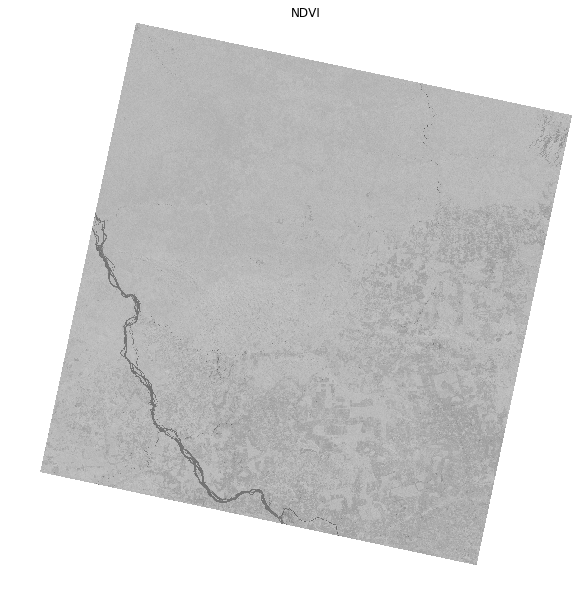

In [29]:
pl.figure(figsize=(10,10))
pl.title('NDVI')
#raster_img = skimage.img_as_float(raster_img).astype(np.float32)
ndvi = preproc.get_index_band("ndvi")
preproc.save_index_raster("ndvi", os.path.join(output_dir, "ndvi.tiff"))
pl.imshow(ndvi, cmap="gray")
pl.axis('off')

(-0.5, 7590.5, 7740.5, -0.5)

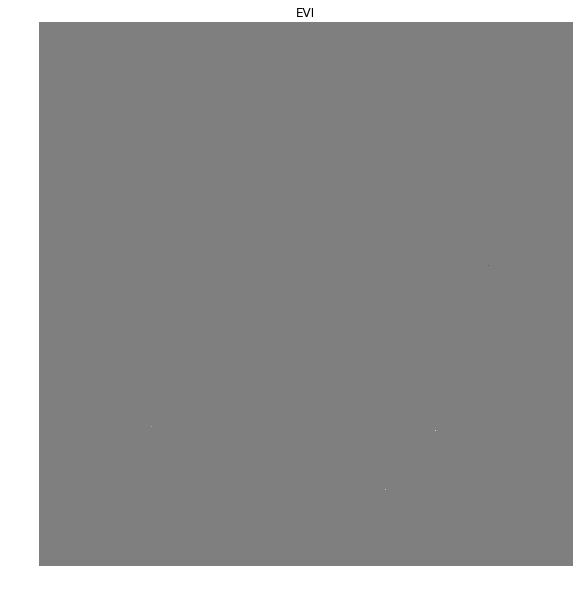

In [30]:
pl.figure(figsize=(10,10))
pl.title('EVI')
evi = preproc.get_index_band("evi")
preproc.save_index_raster("ndvi", os.path.join(output_dir, "evi.tiff"))
pl.imshow(evi, cmap="gray")
pl.axis('off')

In [31]:
preproc.save_stacked_raster(os.path.join(output_dir, "new_raster.tiff"))